In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the dataset
file_path = 'solar_data_with_temperature_adjusted_irradiance.csv'
solar_data = pd.read_csv(
    file_path,
    index_col=[0],  # Use 'time' as the index
    parse_dates=[0]  # Parse the 'time' column as datetime
).drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

# Display the resulting DataFrame structure
print(solar_data.info())  # Check the structure of the DataFrame
print(solar_data.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GHI                           8760 non-null   int64  
 1   DNI                           8760 non-null   int64  
 2   DHI                           8760 non-null   int64  
 3   Temperature                   8760 non-null   float64
 4   Tilted Irradiance (Adjusted)  8760 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 410.6 KB
None
                     GHI  DNI  DHI  Temperature  Tilted Irradiance (Adjusted)
time                                                                         
2019-01-01 00:00:00    0    0    0          8.6                           0.0
2019-01-01 01:00:00    0    0    0          9.4                           0.0
2019-01-01 02:00:00    0    0    0         10.1                           0.

In [33]:
solar_data

,GHI,DNI,DHI,Temperature,Tilted Irradiance (Adjusted)
time,,,,,
2019-01-01 00:00:00,0,0,0,8.6,0.0
2019-01-01 01:00:00,0,0,0,9.4,0.0
2019-01-01 02:00:00,0,0,0,10.1,0.0
2019-01-01 03:00:00,0,0,0,10.6,0.0
2019-01-01 04:00:00,0,0,0,11.4,0.0
...,...,...,...,...,...
2019-12-31 19:00:00,0,0,0,6.1,0.0
2019-12-31 20:00:00,0,0,0,6.6,0.0
2019-12-31 21:00:00,0,0,0,6.9,0.0


In [34]:
# Print the first few rows of the data
print("First few rows of the solar data:")
print(solar_data.head())

First few rows of the solar data:
                     GHI  DNI  DHI  Temperature  Tilted Irradiance (Adjusted)
time                                                                         
2019-01-01 00:00:00    0    0    0          8.6                           0.0
2019-01-01 01:00:00    0    0    0          9.4                           0.0
2019-01-01 02:00:00    0    0    0         10.1                           0.0
2019-01-01 03:00:00    0    0    0         10.6                           0.0
2019-01-01 04:00:00    0    0    0         11.4                           0.0


In [35]:
# Check the data structure (columns and types)
print("\nData Structure (Columns and Data Types):")
print(solar_data.info())


Data Structure (Columns and Data Types):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GHI                           8760 non-null   int64  
 1   DNI                           8760 non-null   int64  
 2   DHI                           8760 non-null   int64  
 3   Temperature                   8760 non-null   float64
 4   Tilted Irradiance (Adjusted)  8760 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 410.6 KB
None


In [36]:
# Check for missing values
print("\nMissing Values Summary:")
missing_values = solar_data.isnull().sum()
print(missing_values)


Missing Values Summary:
GHI                             0
DNI                             0
DHI                             0
Temperature                     0
Tilted Irradiance (Adjusted)    0
dtype: int64



Plotting Time Series for GHI:


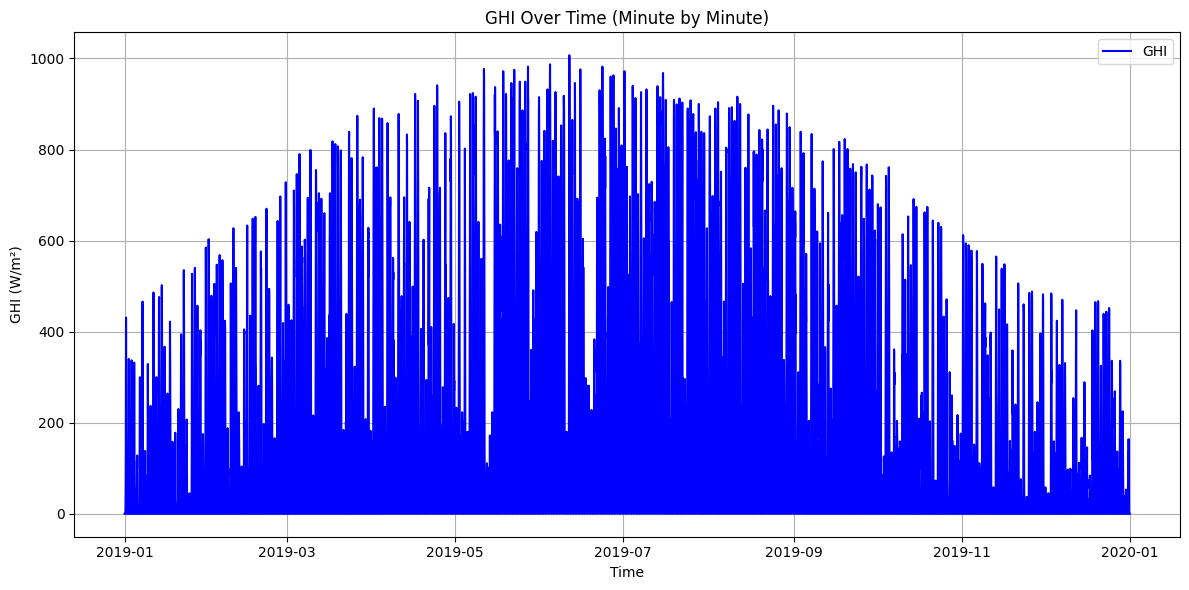


Plotting Time Series for DNI:


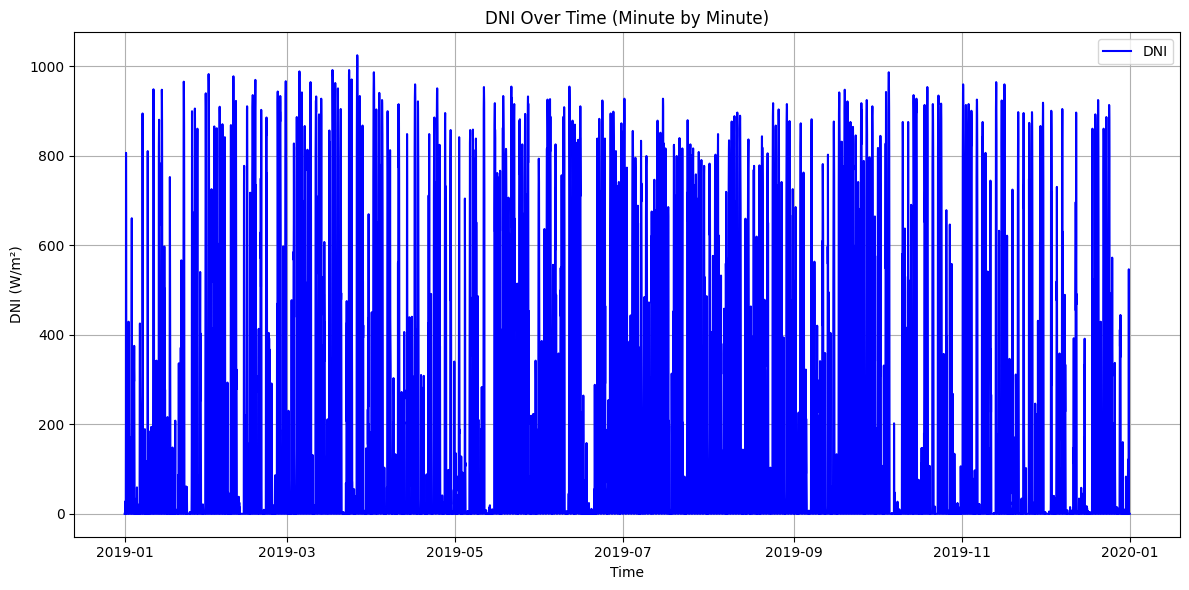


Plotting Time Series for DHI:


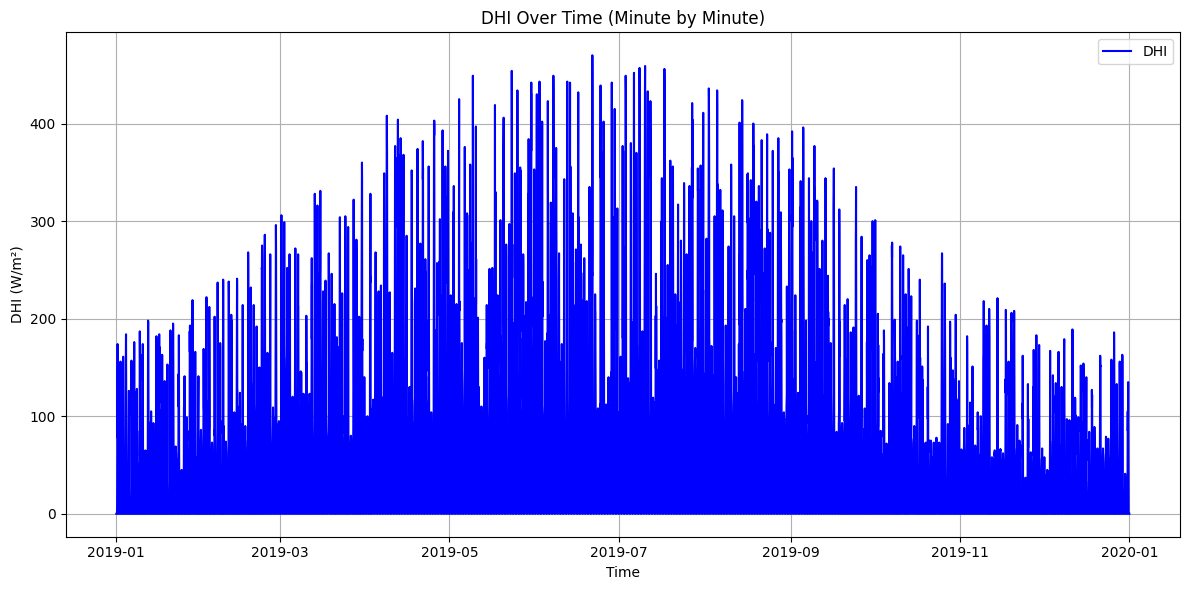


Plotting Time Series for Temperature:


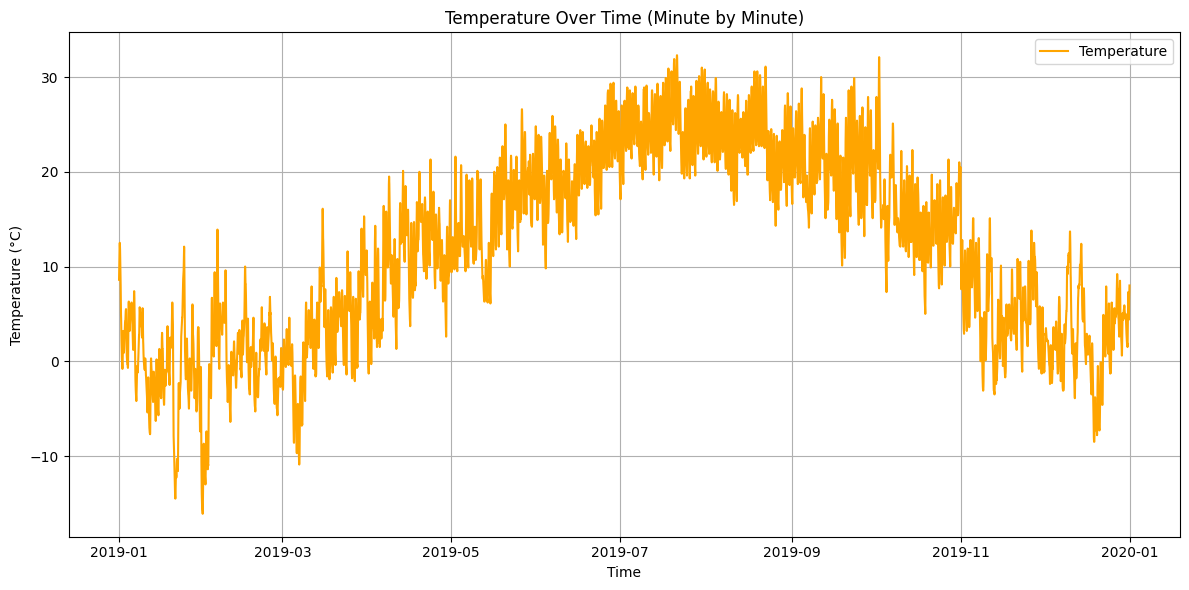


Correlation matrix (based on raw minute-by-minute data):


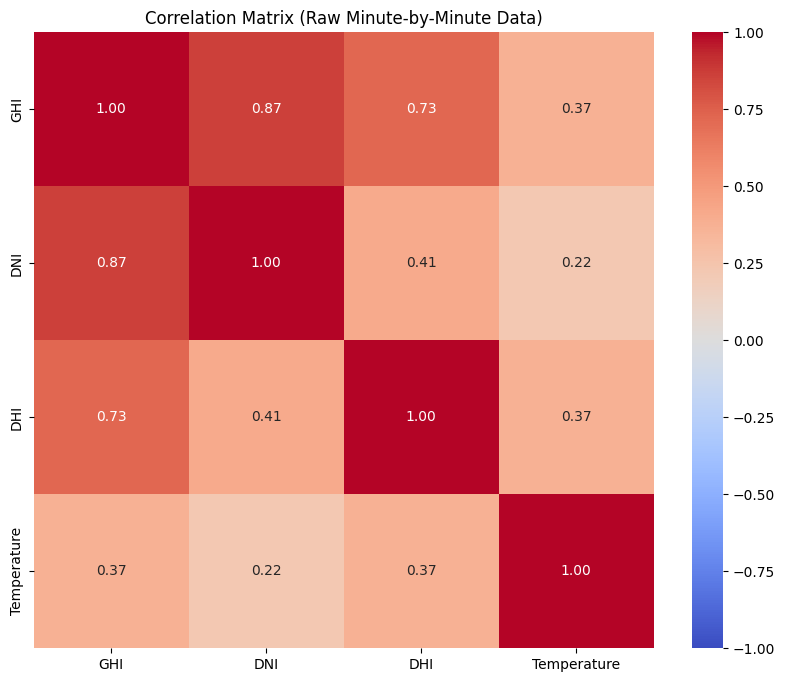

In [41]:
# List of numerical columns to plot (update these based on your dataset)
numerical_columns = ['GHI', 'DNI', 'DHI', 'Temperature']  # Adjust based on your data

# Create time series plots for each of the numerical columns (one value per minute)
for column in numerical_columns:
    print(f"\nPlotting Time Series for {column}:")
    
    # Create a plot for the data for each feature (minute-by-minute)
    plt.figure(figsize=(12, 6))
    plt.plot(solar_data.index, solar_data[column], color='blue' if column != 'Temperature' else 'orange', label=column)
    
    # Customize the plot
    plt.title(f'{column} Over Time (Minute by Minute)')
    plt.xlabel('Time')
    plt.ylabel(f'{column} (W/m²)' if column not in ['Temperature'] else f'{column} (°C)')
    plt.grid(True)
    
    # Show legend
    plt.legend()
    
    # Save the plot as a PNG image
    plt.tight_layout()
    plt.savefig(f'{column}_over_time.png')  # Save each plot as a PNG
    plt.show()

# Check for correlations between variables (based on the raw minute-by-minute data)
print("\nCorrelation matrix (based on raw minute-by-minute data):")

# Generate correlation matrix for the numerical columns
correlation_matrix = solar_data[numerical_columns].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Raw Minute-by-Minute Data)")
plt.show()


<Axes: title={'center': 'Tilted Irradiance Over Time (First 1000 datapoints)'}, xlabel='time'>

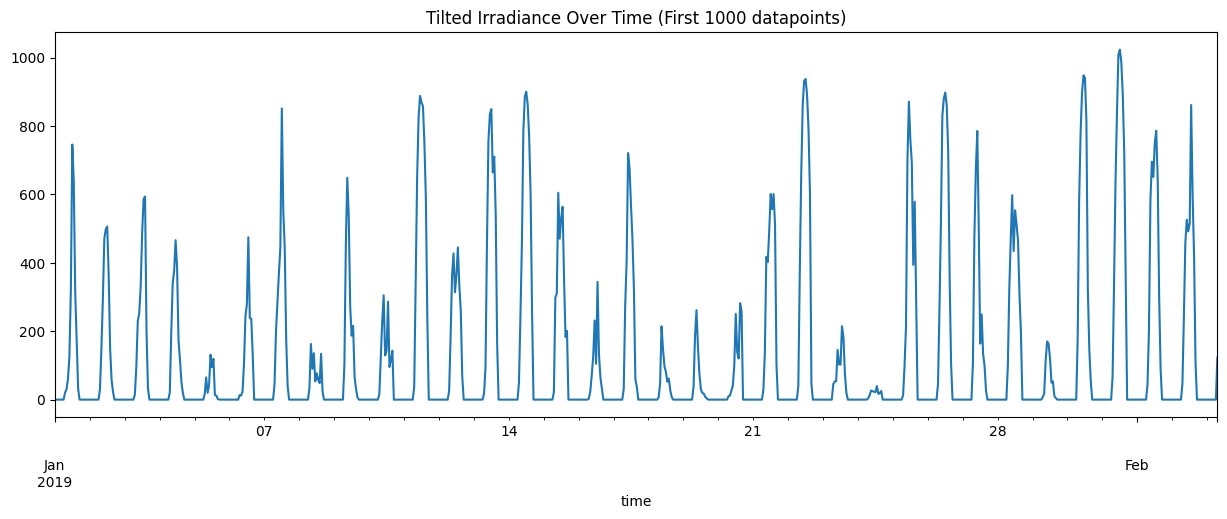

In [44]:
# Step 5: Plotting the Tilted Irradiance for the first 1000 datapoints
solar_data['Tilted Irradiance (Adjusted)'].head(800).plot(figsize=(15,5), title='Tilted Irradiance Over Time (First 800 datapoints)', style='-')


In [38]:
# Check for basic descriptive statistics
print("\nDescriptive Statistics:")
print(solar_data.describe())


Descriptive Statistics:
               GHI          DNI          DHI  Temperature  \
count  8760.000000  8760.000000  8760.000000  8760.000000   
mean    160.335731   178.960502    60.535616    11.786062   
std     247.395035   294.831714    88.938913    10.038915   
min       0.000000     0.000000     0.000000   -16.100000   
25%       0.000000     0.000000     0.000000     3.000000   
50%       5.000000     0.000000     5.000000    12.300000   
75%     245.000000   279.000000    97.000000    20.500000   
max    1007.000000  1024.000000   470.000000    32.300000   

       Tilted Irradiance (Adjusted)  
count                   8760.000000  
mean                     200.776329  
std                      294.136116  
min                        0.000000  
25%                        0.000000  
50%                        8.134358  
75%                      354.104698  
max                     1086.628419  


In [39]:
# Identify outliers based on Z-scores (optional, if applicable)
from scipy import stats
z_scores = stats.zscore(solar_data.select_dtypes(include=['float64', 'int64']))
outliers = (z_scores > 3) | (z_scores < -3)
outliers_df = solar_data[(outliers).any(axis=1)]

print(f"\nNumber of rows with outliers: {outliers_df.shape[0]}")


Number of rows with outliers: 294
